## Machine Learning - Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import pylab as pl

In [3]:
df = pd.read_csv(r"C:\Users\golna\OneDrive\Desktop\Personal Projects\Student_Performance.csv")
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [6]:
print(df.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [7]:
cdf = df[['Hours Studied', 'Previous Scores','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]
print(cdf.head(5))

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

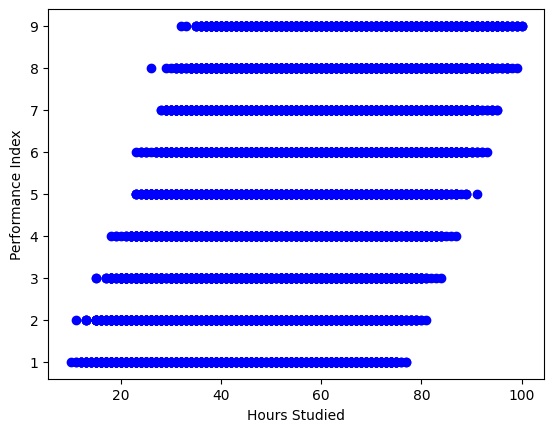

In [16]:
plt.scatter(train['Performance Index'], train['Hours Studied'], color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = np.asarray(train[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
y = np.asarray(train[['Performance Index']])
reg.fit(x, y)

LinearRegression()

In [21]:
reg.fit(x, y)
print('Coefficeints: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficeints:  [[2.85299625 1.01863635 0.47776343 0.19810882]]
Intercept:  [-33.79179019]


In [23]:
x = np.asarray(test[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
y = np.asarray(test[['Performance Index']])
yhat = reg.predict(x)
print('Residual sum of squares (RSS): %.2f' % np.mean((yhat - y)**2))
print('Variance score: %.2f' % reg.score(x, y))

Residual sum of squares (RSS): 4.35
Variance score: 0.99


In [24]:
r2_score = reg.score(x, y)
print('R² score: %.2f' % r2_score)

R² score: 0.99
